In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder

sns.set_style("darkgrid")

# Load data

In [2]:
%%time
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

print(train.shape, test.shape)

(1460, 81) (1459, 80)
CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 56.9 ms


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis

In [4]:
train.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max')

,min,max,mean
BsmtHalfBath,0.0,2.0,0.057534
HalfBath,0.0,2.0,0.382877
FullBath,0.0,3.0,1.565068
KitchenAbvGr,0.0,3.0,1.046575
BsmtFullBath,0.0,3.0,0.425342
Fireplaces,0.0,3.0,0.613014
GarageCars,0.0,4.0,1.767123
BedroomAbvGr,0.0,8.0,2.866438
OverallCond,1.0,9.0,5.575342
OverallQual,1.0,10.0,6.099315


In [5]:
n = train.select_dtypes(include=object)
for c in n.columns:
    print('{:<14}'.format(c), train[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

skew=0.12122191311528363


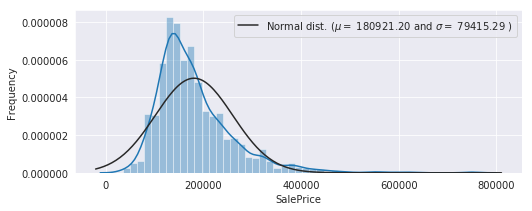

In [6]:
plt.figure(figsize=(8,3))
sns.distplot(train['SalePrice'], fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
print('skew={}'.format(skew(np.log1p(train['SalePrice']))))

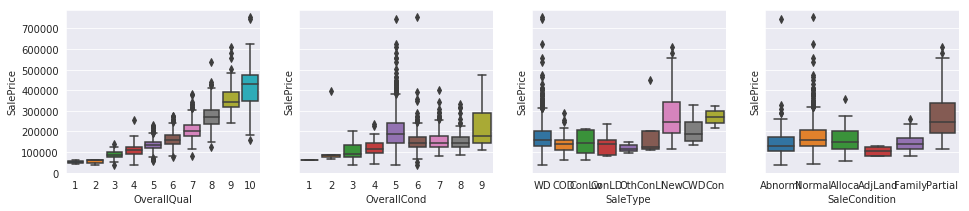

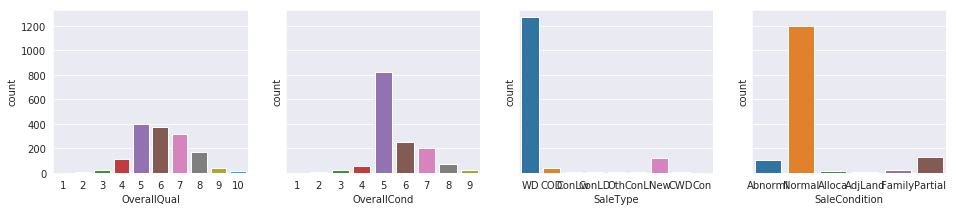

In [7]:
cols = ['OverallQual','OverallCond','SaleType','SaleCondition']
sorted_data = train.sort_values(by='SalePrice')

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4 * 4, 3), sharey=True)
for i, c in zip(np.arange(len(axes)), cols):
    sns.boxplot(x=c, y='SalePrice', data=sorted_data, ax=axes[i])

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4 * 4, 3), sharey=True)
for i, c in zip(np.arange(len(axes)), cols):
    sns.countplot(x=c, data=sorted_data, ax=axes[i])

(1460, 81)
(1452, 81)


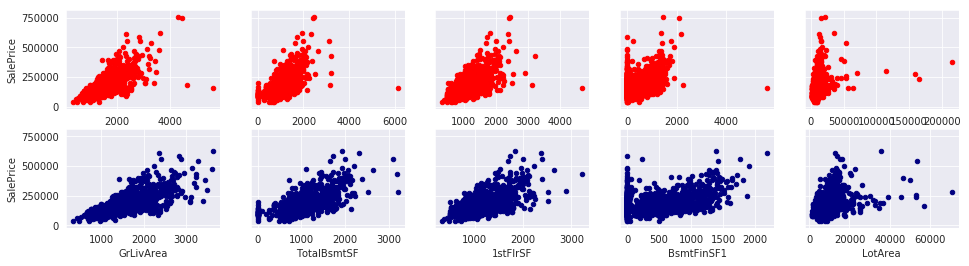

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4), sharey=True)
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='red')

# delete outliers
print(train.shape)
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
print(train.shape)

for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='navy')

## Preprocessing

In [9]:
all_data = train.append(test, sort=False).reset_index(drop=True)
all_data.shape

(2911, 81)

* fillna

In [10]:
n = all_data.drop('SalePrice', axis=1).loc[:,all_data.isnull().any()].isnull().sum()
print('ALL:', all_data.shape[0])
print('-' * 30)
print(n.sort_values(ascending=False))

ALL: 2911
------------------------------
PoolQC          2903
MiscFeature     2808
Alley           2713
Fence           2341
FireplaceQu     1420
LotFrontage      483
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


In [11]:
# drop feature
all_data.drop(['MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# fillna with 0
cols = ['GarageArea', 'GarageCars', 'GarageFinish', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for c in cols:
    all_data[c].fillna(0, inplace=True)

# fillna with 'None'
cols = ['BsmtQual','BsmtCond','KitchenQual','FireplaceQu','GarageType','GarageQual','GarageCond',
        'PoolQC','BsmtFinType1','BsmtFinType2','BsmtExposure','MasVnrType']
for c in cols:
    all_data[c].fillna('None', inplace=True)

# fillna with other 
all_data.loc[all_data['GarageYrBlt'].isnull(),'GarageYrBlt'] = all_data.loc[all_data['GarageYrBlt'].isnull(),'YearBuilt']

# fillna with group median
all_data['LotFrontage'] = all_data.groupby(pd.qcut(all_data['LotArea'], 10))['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
n = all_data.drop('SalePrice', axis=1).loc[:,all_data.isnull().any()].isnull().sum()
print(n.sort_values(ascending=False))

MSZoning       4
Functional     2
Utilities      2
SaleType       1
Electrical     1
Exterior2nd    1
Exterior1st    1
dtype: int64


In [13]:
for i, t in all_data.loc[:, all_data.columns != 'SalePrice'].dtypes.iteritems():
    if t == object:
        all_data[i].fillna(all_data[i].mode()[0], inplace=True)
    else:
        all_data[i].fillna(all_data[i].median(), inplace=True)

* feature creation

In [14]:
all_data['_OverallQualCond'] = all_data['OverallQual'] + (all_data['OverallCond'] - 5) * 0.5
all_data['_TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']
all_data['_PorchArea'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']
all_data['_TotalArea'] = all_data['_TotalSF'] + all_data['GarageArea'] + all_data['_PorchArea']
all_data['_Rooms'] = all_data['TotRmsAbvGrd'] + all_data['FullBath'] + all_data['HalfBath']
all_data['_BathRooms'] = all_data['FullBath'] + all_data['BsmtFullBath'] + (all_data['HalfBath'] + all_data['BsmtHalfBath']) * 0.7
all_data['_GrLAreaAveByRms'] = all_data['GrLivArea'] / all_data['_Rooms']

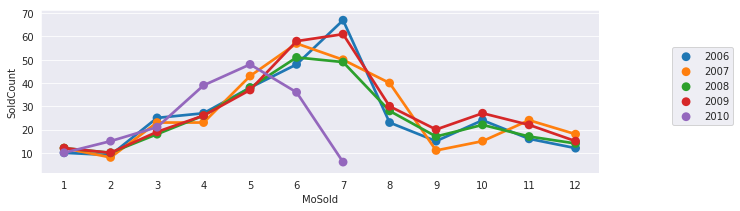

In [15]:
grp = train.groupby(['YrSold','MoSold'])
piv = grp.count()['SalePrice'].reset_index()
piv.columns = ['YrSold','MoSold','SoldCount']

plt.figure(figsize=(10, 3))
sns.pointplot(x='MoSold', y='SoldCount', hue='YrSold', data=piv, join=True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 0.8, 0.2, 0))

all_data['_SaleSeason'] = all_data['MoSold'].replace({1:0, 2:0, 3:0, 4:1, 5:1, 6:2, 7:2, 8:1, 9:0, 10:0, 11:0, 12:0})

* encode, transform

In [16]:
# year feature
cols = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
print(all_data[cols].describe())

# correct invalid value
all_data.loc[all_data['GarageYrBlt'] > 2010, 'GarageYrBlt'] = all_data['YearBuilt']

# relation feature
all_data['_Remod_Sold'] = 0
all_data.loc[all_data['YrSold'] <= all_data['YearRemodAdd'], '_Remod_Sold'] = 1
all_data['_Built_Sold'] = 0
all_data.loc[all_data['YrSold'] <= all_data['YearBuilt'], '_Built_Sold'] = 1

# year group
#year_map = pd.concat(pd.Series('YearBin' + str(i+1), index=range(1871+i*10,1881+i*10)) for i in range(0, 14))
#all_data['_YearBuiltGrp'] = all_data['YearBuilt'].map(year_map)

# diff feature
all_data['_YrBlt_to_sold'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['_YrRemod_to_sold'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data['_GrgYrBlt_to_sold'] = all_data['YrSold'] - all_data['GarageYrBlt']
print('-' * 60)
print(all_data[['_YrBlt_to_sold','_YrRemod_to_sold','_GrgYrBlt_to_sold']].describe())
all_data.drop(cols, axis=1, inplace=True)

            YrSold    YearBuilt  YearRemodAdd  GarageYrBlt
count  2911.000000  2911.000000   2911.000000  2911.000000
mean   2007.793542  1971.280660   1984.240124  1976.235314
std       1.316159    30.310363     20.899129    27.056717
min    2006.000000  1872.000000   1950.000000  1872.000000
25%    2007.000000  1953.000000   1965.000000  1958.000000
50%    2008.000000  1973.000000   1993.000000  1978.000000
75%    2009.000000  2001.000000   2004.000000  2001.000000
max    2010.000000  2010.000000   2010.000000  2207.000000
------------------------------------------------------------
       _YrBlt_to_sold  _YrRemod_to_sold  _GrgYrBlt_to_sold
count     2911.000000       2911.000000        2911.000000
mean        36.512882         23.553418          31.627276
std         30.354533         20.895316          26.772817
min         -1.000000         -2.000000          -1.000000
25%          7.000000          4.000000           7.000000
50%         35.000000         15.000000          30.00

In [17]:
# to categorical feature
cols = ['MSSubClass']
for c in cols:
    all_data[c] = all_data[c].astype(str)

In [18]:
#log transform skewed numeric features
_='''
'''
numeric_feats = all_data.drop('SalePrice', axis=1).dtypes[all_data.dtypes != "object"].index
skewed = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats = skewed[skewed > 1].index
print(skewed_feats)

for c in (skewed_feats):
    all_data[c] = np.log1p(all_data[c])

Index(['MiscVal', 'PoolArea', 'LowQualFinSF', '3SsnPorch', '_Built_Sold',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'BsmtHalfBath',
       'ScreenPorch', 'LotArea', '_Remod_Sold', 'MasVnrArea', 'OpenPorchSF',
       '_PorchArea', 'WoodDeckSF', '1stFlrSF'],
      dtype='object')


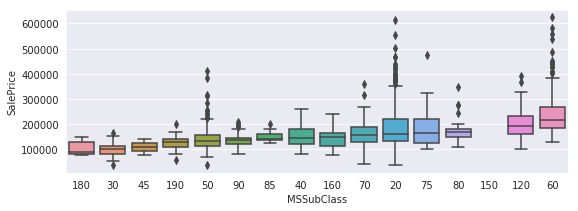

In [19]:
mssubclass_map = {'180':1, '30':2, '45':2, '190':3, '50':3, '90':3, '85':4, '40':4, '160':4, 
                  '70':5, '20':5, '75':5, '80':5, '150':5, '120':6, '60':6}
all_data['_MSSubClassBin'] = all_data['MSSubClass'].map(mssubclass_map)

plt.figure(figsize=(9, 3))
ax = sns.boxplot(x='MSSubClass', y='SalePrice', data=all_data[all_data['SalePrice'].notnull()], order=mssubclass_map.keys())

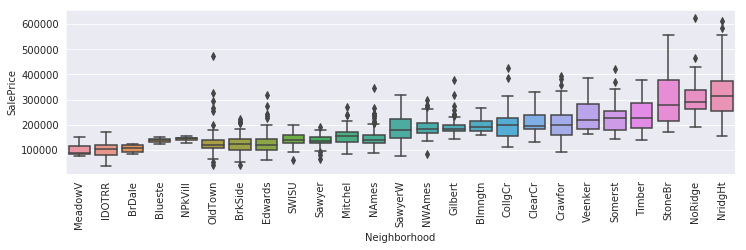

In [20]:
neighborhood_map = {
        "MeadowV":0, "IDOTRR":0, "BrDale":0, 
        "Blueste":1, "NPkVill":1,
        "OldTown":2, "BrkSide":2, "Edwards":2, 
        "SWISU":3, "Sawyer":3, 
        "Mitchel":4, "NAmes":4, 
        "SawyerW":5, "NWAmes":5, 
        "Gilbert":6, "Blmngtn":6, 
        "CollgCr":7, "ClearCr":7, "Crawfor":7, 
        "Veenker":8, "Somerst":8, "Timber":8, 
        "StoneBr":9, "NoRidge":9, "NridgHt":9,
    }
all_data["_NeighborhoodBin"] = all_data["Neighborhood"].map(neighborhood_map)

plt.figure(figsize=(12, 3))
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=all_data[all_data['SalePrice'].notnull()], order=neighborhood_map.keys())
_=ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

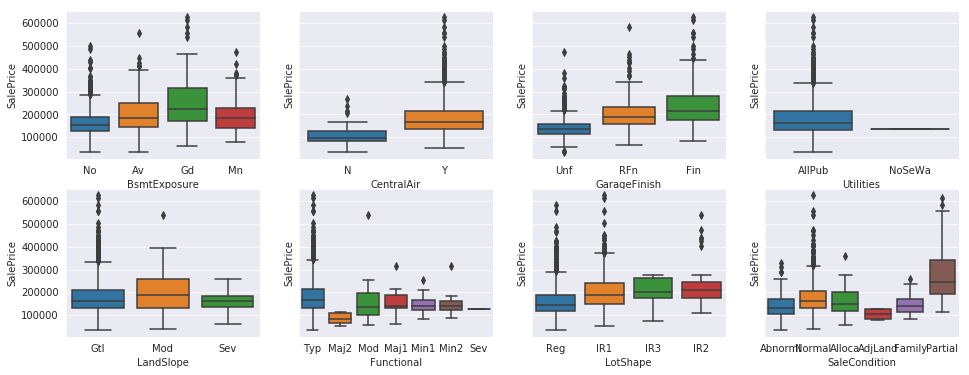

In [21]:
# encode quality - Ex(Excellent), Gd（Good）, TA（Typical/Average）, Fa（Fair）, Po（Poor）
all_data.loc[(all_data['PoolArea'] > 0) & (all_data['PoolQC'] == 'None'), 'PoolQC'] = 'TA'
cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for c in cols:
    all_data[c].replace({'None':0, 'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, inplace=True)

# plot
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(4 * 4, 3 * 2), sharey=True)
axes = np.ravel(axes)
cols = ['BsmtExposure','CentralAir','GarageFinish','Utilities','LandSlope','Functional','LotShape','SaleCondition']
for i, c in zip(np.arange(len(axes)), cols):
    sns.boxplot(x=c, y='SalePrice', data=train.sort_values(by='SalePrice'), ax=axes[i])

# encode remaining columns
all_data['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0}, inplace=True)
all_data['CentralAir'].replace({'Y':1,'N':0}, inplace=True)
all_data['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'None':0}, inplace=True)
all_data['Utilities'].replace({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0}, inplace=True)
all_data['LandSlope'].replace({'Gtl':2,'Mod':1,'Sev':0}, inplace=True)
all_data['Functional'].replace({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}, inplace=True)
all_data['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0}, inplace=True)

# encode to another 
all_data['_PriceCut'] = all_data['SaleCondition'].replace(
    {'AdjLand':1,'Abnorml':1,'Family':1,'Alloca':1,'Normal':0,'Partial':0})

In [22]:
# Condition1&2, Exterior1st&2nd --> marged dummies
def pair_features_to_dummies(df, col1, col2, prefix):
    d_1 = pd.get_dummies(df[col1].astype(str), prefix=prefix)
    d_2 = pd.get_dummies(df[col2].astype(str), prefix=prefix)
    for c in list(set(list(d_1.columns) + list(d_2.columns))):
        if not c in d_1.columns: d_1[c] = 0
        if not c in d_2.columns: d_2[c] = 0
    return (d_1 + d_2).clip(0, 1)

cond = pair_features_to_dummies(all_data,'Condition1','Condition2','Condition')
exterior = pair_features_to_dummies(all_data,'Exterior1st','Exterior2nd','Exterior')

all_data = pd.concat([all_data, cond, exterior], axis=1)
all_data.drop(['Condition1','Condition2','Exterior1st','Exterior2nd'], axis=1, inplace=True)
all_data.loc[:,cond.columns[0]:].head()

,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,...,Exterior_ImStucc,Exterior_MetalSd,Exterior_Other,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_Wd Shng,Exterior_WdShing
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Create new polynomial features about OverallQual
all_data['_TotalSF_OverallQual'] = all_data['_TotalSF'] * all_data['OverallQual']
all_data['_Neighborhood_OverallQual'] = all_data['_NeighborhoodBin'] + all_data['OverallQual']
all_data['_Functional_OverallQual'] = all_data['Functional'] + all_data['OverallQual']

In [24]:
for i, t in all_data.loc[:, all_data.columns != 'SalePrice'].dtypes.iteritems():
    if t == object:
        all_data = pd.concat([all_data, pd.get_dummies(all_data[i].astype(str), prefix=i)], axis=1)
        all_data.drop(i, axis=1, inplace=True)

In [25]:
#sns.boxplot(x='GarageCars', y='SalePrice', data=all_data[all_data['SalePrice'].notnull()])
all_data['GarageCars'] = all_data['GarageCars'].clip(0,3)

# They are either not very helpful or they cause overfitting.
all_data.drop('MSZoning_C (all)', axis=1, inplace=True)

# adverse effect
#drop_cols = ['MiscVal', 'MoSold', 'ExterCond', 'BsmtFinSF2', 'BedroomAbvGr']
drop_cols = ['MiscVal', 'MoSold']
all_data.drop(drop_cols, axis=1, inplace=True)

#all_data.loc[(all_data['BsmtFinType2']=='None') & (all_data['BsmtFinSF2']>0), 'BsmtFinType2'] = 'ALQ'
#all_data.drop('BsmtFinType2', axis=1, inplace=True)

# Predict

In [26]:
train = all_data[all_data['SalePrice'].notnull()]
test = all_data[all_data['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [27]:
X_train = train.drop(['SalePrice','Id'], axis=1)
Y_train = train['SalePrice']
X_test  = test.drop(['Id'], axis=1)

print(X_train.shape, Y_train.shape, X_test.shape)

(1452, 262) (1452,) (1459, 262)


- create model

In [28]:
from sklearn import ensemble, metrics
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [29]:
#scaler = preprocessing.RobustScaler();
scaler = preprocessing.StandardScaler();
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

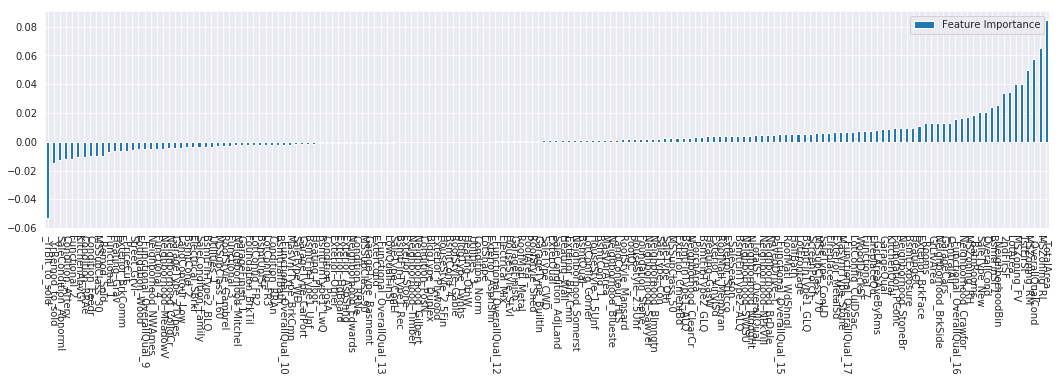

In [30]:
lasso = linear_model.Lasso(alpha=0.001, max_iter=5000, random_state=42)
lasso.fit(X_train_scaled, np.log1p(Y_train))
fi = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)
fi = fi[fi["Feature Importance"] != 0].sort_values("Feature Importance")

fi.plot(kind="bar",figsize=(18,4))
plt.xticks(rotation=-90)
plt.show()

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weight):
        self.models = models
        self.weight = weight
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([(model.predict(X) * weight) for model, weight in zip(self.models_, self.weight)])
        return np.sum(predictions, axis=1)

- predict

In [32]:
KRR = KernelRidge(alpha=0.05, kernel='polynomial', degree=1, coef0=2.5)
lasso = linear_model.Lasso(alpha=0.001, max_iter=5000, random_state=42)
GBoost = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, 
                                            max_features='sqrt', loss='huber', random_state=42)

reg = AveragingModels(models=(KRR, lasso, GBoost), weight=[0.25, 0.35, 0.40])

In [33]:
def rmse_cv(model, x, y):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

score = rmse_cv(reg, X_train_scaled, np.log1p(Y_train))
print(round(score.mean(), 5))

0.1112


In [34]:
reg.fit(X_train_scaled, np.log1p(Y_train))
result = np.expm1(reg.predict(X_test_scaled))

# Submit

In [35]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": result
})
submission.to_csv("submission.csv", index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [36]:
submission.head(10)

,Id,SalePrice
1452,1461,125744.054976
1453,1462,158609.953958
1454,1463,187025.610959
1455,1464,196062.897883
1456,1465,194914.291911
1457,1466,171434.225624
1458,1467,178869.654914
1459,1468,165849.484650
1460,1469,185043.433360
1461,1470,122870.112963
